In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
animals=pd.read_csv('horse.csv')

In [3]:
animals.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
animals.shape

(299, 28)

In [5]:
animals.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [6]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [7]:
# check the values of age
animals['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

In [8]:
# fill the missing values of Numerical variables with 'median' 
# fill the missing values of categorical variables with 'most frequent' values
from sklearn.impute import SimpleImputer

In [9]:
# create objects for calculating the null replacement values
numeric_imputer=SimpleImputer(missing_values=np.nan, strategy='median')
categoric_imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [10]:
# make lists of numerical & categorical variables that has missing values
missing_numeric_col=['rectal_temp','pulse','respiratory_rate','nasogastric_reflux_ph',
                     'packed_cell_volume','total_protein','abdomo_protein']

missing_categoric_col=['surgery', 'age', 'temp_of_extremities','peripheral_pulse','mucous_membrane',
                       'capillary_refill_time', 'pain', 'peristalsis','abdominal_distention', 
                       'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen',
                       'abdomo_appearance', 'surgical_lesion','cp_data']

In [11]:
# fit the imputer objects to the missing data columns
animals[missing_numeric_col]=numeric_imputer.fit_transform(animals[missing_numeric_col])
animals[missing_categoric_col]=categoric_imputer.fit_transform(animals[missing_categoric_col])

In [12]:
animals.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [13]:
# Assign the features in X axis & target in Y axis
x_features=animals.drop(['outcome'],axis=1)

In [14]:
# see the values of the target variable outcome
animals['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [15]:
y_target=animals['outcome']

In [16]:
y_target.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

In [17]:
# convert the categorical features into numericals by One Hot Encoding
categorical_variables=['surgery', 'age', 'temp_of_extremities','peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 
                       'abdomen','abdomo_appearance', 'surgical_lesion','cp_data']
x_features=pd.get_dummies(columns=categorical_variables,data=x_features,drop_first=True)

In [18]:
x_features.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,530101,38.5,66.0,28.0,5.0,45.0,8.4,2.3,11300,0,...,0,0,0,0,0,0,1,0,0,0
1,534817,39.2,88.0,20.0,5.0,50.0,85.0,2.0,2208,0,...,0,0,0,0,0,1,1,0,0,0
2,530334,38.3,40.0,24.0,5.0,33.0,6.7,2.3,0,0,...,0,1,0,0,1,0,1,0,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,0,0,0,0,1,1,1
4,530255,37.3,104.0,35.0,5.0,74.0,7.4,2.3,4300,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# convert the target variables into numerical values applying Label Encoder
from sklearn.preprocessing import LabelEncoder

In [20]:
# create X & y variables
X,y=x_features.values,y_target.values

In [21]:
# create label encoder estimator
label_enc=LabelEncoder()

In [22]:
# convert categorical y values into numericals as 0,1,2
y=label_enc.fit_transform(y)

In [23]:
# see the classes of the label encoder object
label_enc.classes_

array(['died', 'euthanized', 'lived'], dtype=object)

In [24]:
# check the values of y
y[5:10]

array([2, 2, 0, 1, 2])

In [25]:
# Build a Model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [26]:
print('Training size',x_train.shape)
print('Testing size',x_test.shape)

Training size (239, 51)
Testing size (60, 51)


## Decision Tree Algorithm

In [27]:
# import decision tree class
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [57]:
# create an object of Decision tree classifier with a bias on training set = 5 or 3 / without a bias
dt_classifier=DecisionTreeClassifier(max_depth=3)

In [58]:
# fit the training dataset into the model object
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
# predict the training set
y_train_pred=dt_classifier.predict(x_train)

In [60]:
# check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train=accuracy_score(y_train_pred,y_train)

In [61]:
accuracy_train

0.7573221757322176

In [62]:
confusion_matrix(y_train_pred,y_train)

array([[ 48,   9,  19],
       [  0,  17,   9],
       [ 13,   8, 116]], dtype=int64)

In [63]:
# predict the test dataset
y_test_pred=dt_classifier.predict(x_test)

In [64]:
# check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_test=accuracy_score(y_test_pred,y_test)

In [65]:
accuracy_test

0.5833333333333334

In [66]:
confusion_matrix(y_test_pred,y_test)

array([[10,  4,  8],
       [ 0,  2,  3],
       [ 6,  4, 23]], dtype=int64)

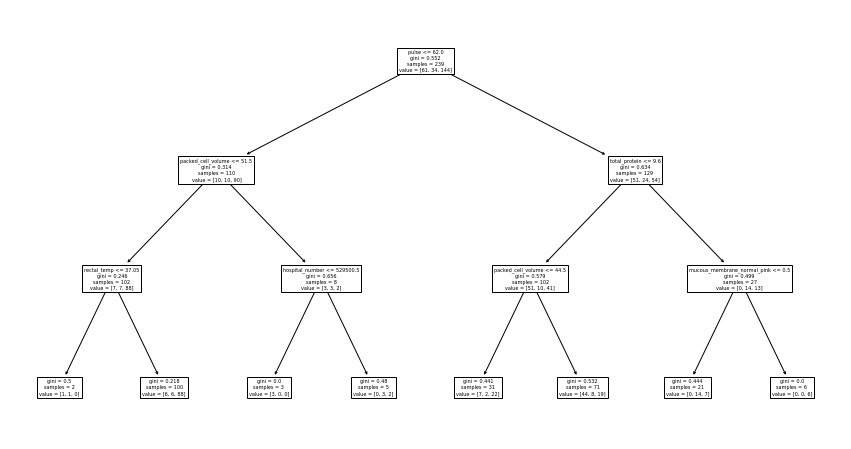

In [68]:
# plot the decision tree
plt.figure(figsize=(15,8))
plot_tree(dt_classifier,feature_names=x_features.columns)
plt.show()

In [45]:
# this is an overfitting model. We need to prune the model to reduce the overfitting

In [69]:
# Pruning Trees : ccp_alpha is the parameter that prunes the tree (here 2% tree is pruned)
pruned_classifier=DecisionTreeClassifier(ccp_alpha=0.02)

In [70]:
pruned_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02)

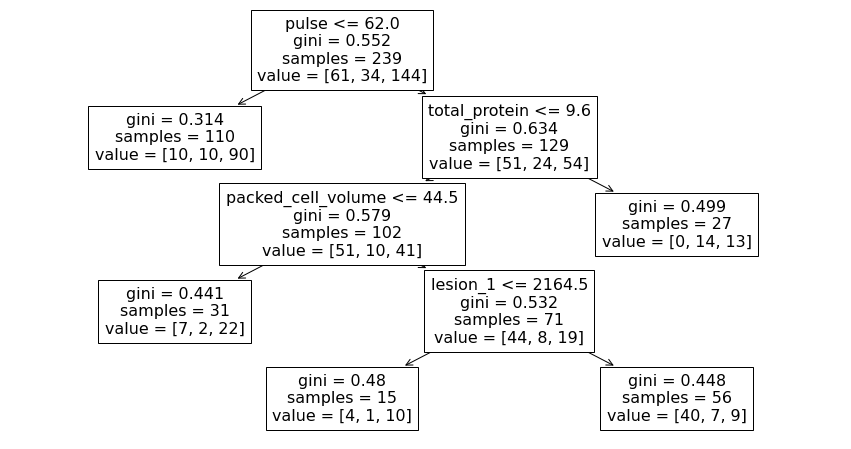

In [71]:
# plot the pruned decision tree
plt.figure(figsize=(15,8))
plot_tree(pruned_classifier,feature_names=x_features.columns)
plt.show()

In [72]:
y_test_pred_pruned=pruned_classifier.predict(x_test)

In [74]:
accuracy_test_pruned=accuracy_score(y_test_pred_pruned,y_test)
accuracy_test_pruned

0.5833333333333334

In [75]:
# try the accuracy with sample split 5
classifier=DecisionTreeClassifier(max_depth=3,min_samples_split=5,ccp_alpha=0.01)

In [76]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3, min_samples_split=5)

In [77]:
y_pred=classifier.predict(x_test)

In [78]:
acc=accuracy_score(y_pred,y_test)
acc

0.6

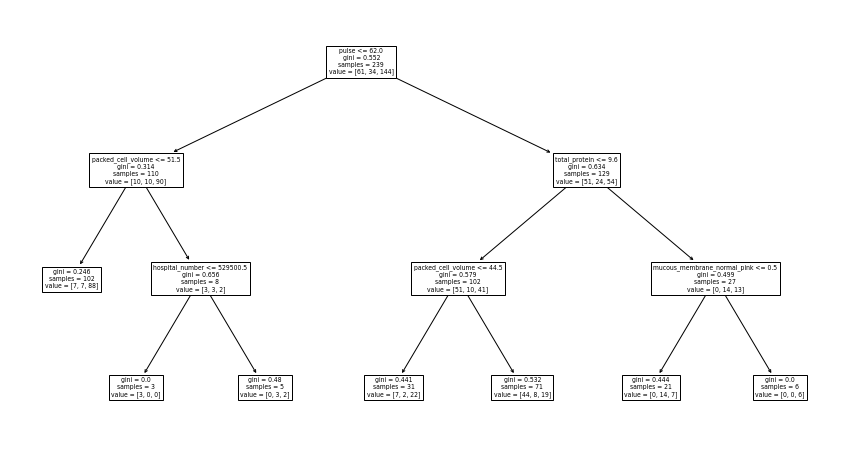

In [79]:
plt.figure(figsize=(15,8))
plot_tree(classifier,feature_names=x_features.columns)
plt.show()

## Random Forest Algorithm

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rand_forest=RandomForestClassifier(max_depth=5)

In [96]:
rand_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [97]:
y_pred_rfc=rand_forest.predict(x_test)

In [98]:
acc_rfc=accuracy_score(y_pred_rfc,y_test)
acc_rfc

0.7166666666666667

In [85]:
# with random forest algorithm we are able to achieve a little better accuracy than the decision tree